In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import prep
from neuralprophet import NeuralProphet, set_log_level

In [2]:
df = pd.read_csv('new_car_sales.csv')

In [3]:
df.Year = pd.to_datetime(df.Year)

In [4]:
df['ds'] = df.Year

In [5]:
df = df.drop(columns='Year')

In [6]:
df = df.rename(columns={'total_sale':'y'})

In [7]:
df.head()

,index,y,ds
0,2,10302,1965-01-01
1,3,8849,1970-01-01
2,4,9298,1975-01-01
3,5,8594,1980-01-01
4,6,12110,1985-01-01


In [8]:
df = df.drop(columns='index')

In [9]:
df.head()

,y,ds
0,10302,1965-01-01
1,8849,1970-01-01
2,9298,1975-01-01
3,8594,1980-01-01
4,12110,1985-01-01


In [93]:
train, test = prep.train_test_split(df)

In [10]:
train_size = .80
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

In [11]:
test.reset_index(inplace=True)

In [12]:
test = test.drop(columns='index')
#train = train.drop(columns='index')

In [13]:
train.shape, test.shape

((29, 2), (7, 2))

In [14]:
train.head()

,y,ds
0,10302,1965-01-01
1,8849,1970-01-01
2,9298,1975-01-01
3,8594,1980-01-01
4,12110,1985-01-01


In [26]:
test = test.drop(columns='level_0')

KeyError: "['level_0'] not found in axis"

In [27]:
m = NeuralProphet(num_hidden_layers=100)
metrics = m.fit(train)
forecast = m.predict(test)

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 80.645% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as YS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 1000


  0%|          | 0/102 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.20E-02, min: 1.41E-01


  0%|          | 0/102 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.58E+01, min: 6.94E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 6.06E-01
Epoch[1000/1000]: 100%|██████████| 1000/1000 [00:02<00:00, 351.00it/s, SmoothL1Loss=0.0154, MAE=918, RMSE=1.23e+3, RegLoss=0]  
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 80.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 80.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS


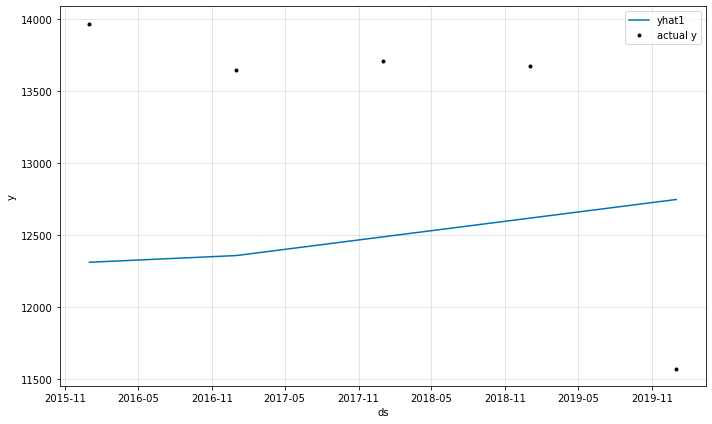

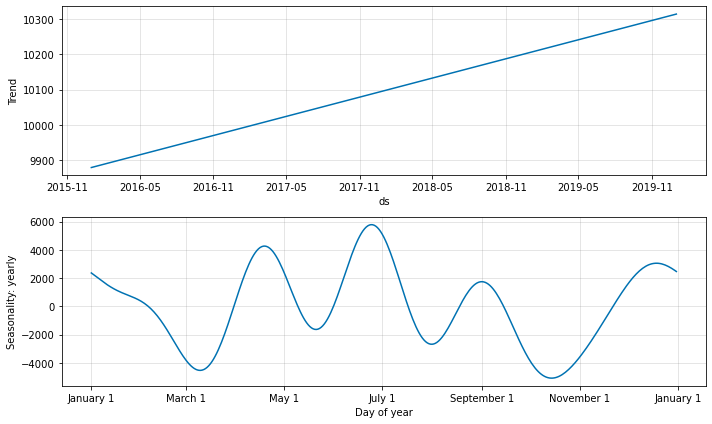

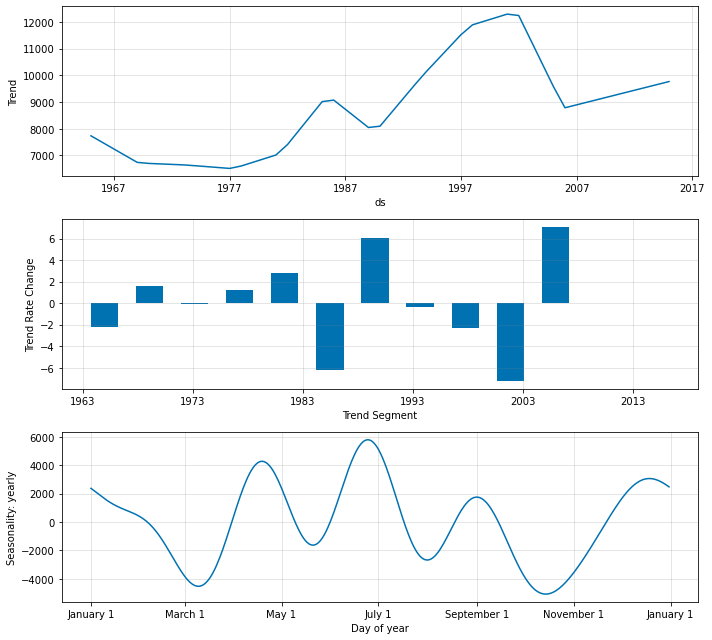

In [28]:
fig_forecast = m.plot(forecast)
fig_components = m.plot_components(forecast)
fig_model = m.plot_parameters()

In [107]:
m = NeuralProphet().fit(train, freq="Y")
df_future = m.make_future_dataframe(train, periods=10)
forecast = m.predict(df_future)
fig_forecast = m.plot(forecast)

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 76.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 1000


  0%|          | 0/102 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.34E+00, min: 1.81E-02


  0%|          | 0/102 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.73E-01, min: 1.02E-03
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 2.85E-01
Epoch[1000/1000]: 100%|██████████| 1000/1000 [00:02<00:00, 341.83it/s, SmoothL1Loss=0.00612, MAE=600, RMSE=776, RegLoss=0]     


AttributeError: 'DataFrame' object has no attribute 'make_future_dataframe'

In [15]:
m2 = NeuralProphet(
    n_lags=12,
    changepoints_range=0.95,
    n_changepoints=30,
    weekly_seasonality=False,
   
)
metrics = m2.fit(train)

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 79.31% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as YS
INFO - (NP.forecaster.__handle_missing_data) - 20 missing dates added.
INFO - (NP.forecaster.__handle_missing_data) - 20 NaN values in column y were auto-imputed.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 1000


  0%|          | 0/103 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.96E-02, min: 5.44E-02


  0%|          | 0/103 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.87E+00, min: 5.44E-02
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 2.25E-01
Epoch[1000/1000]: 100%|██████████| 1000/1000 [00:03<00:00, 307.29it/s, SmoothL1Loss=0.00081, MAE=202, RMSE=255, RegLoss=0]     


In [111]:
df= df.drop(columns='index')

In [20]:
df.shape

(36, 2)

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 83.333% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
WARNING - (py.warnings._showwarnmsg) - /opt/homebrew/anaconda3/lib/python3.9/site-packages/neuralprophet/forecaster.py:2098: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 83.784% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO - (NP.forecaster.__handle_missing_data) - 20 missing dates added.
INFO - (NP.forecaster.__handle_missing_data) - 20 NaN values in column y were auto-imputed.
WARNING - (py.warnings._showwarnmsg) - /opt/homebrew/anaconda3/lib/python3.9/site-packages/neuralprophet/forecaster.py:1406: FutureWarning: The frame.append method is deprecated 

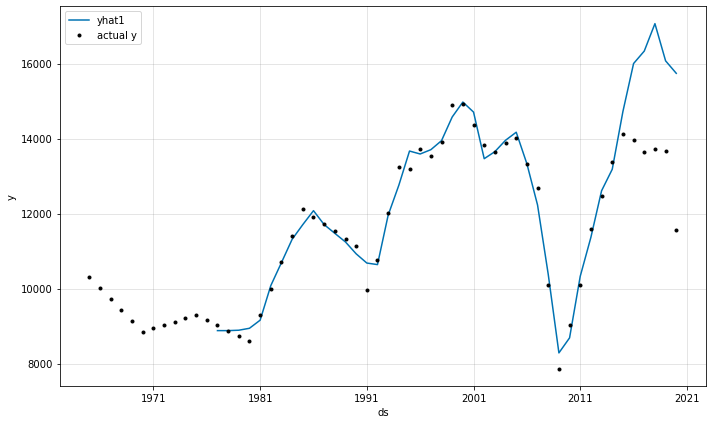

In [16]:
forecast = m2.predict(df)
fig = m2.plot(forecast)

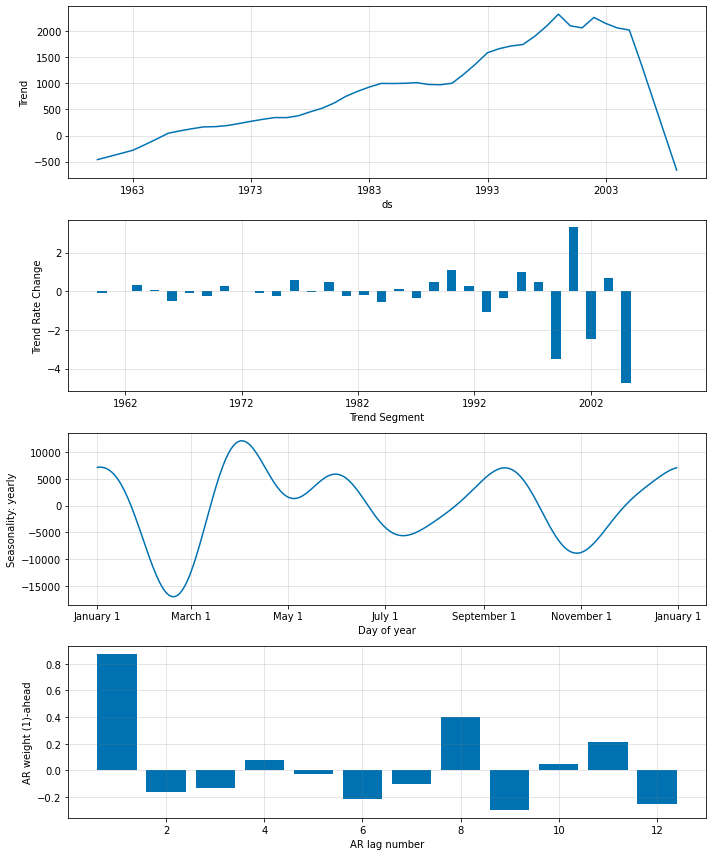

In [33]:
m2 = m2.highlight_nth_step_ahead_of_each_forecast(1) # temporary workaround to plot actual AR weights
fig_param = m2.plot_parameters()

In [30]:
m3 = NeuralProphet(seasonality_mode= "multiplicative", learning_rate = 0.1)



metrics_train = m3.fit(df=train, freq='MS')
metrics_test = m3.test(df=test)

metrics_test

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 79.31% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency MS is different than major frequency YS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 1000
Epoch[1000/1000]: 100%|██████████| 1000/1000 [00:02<00:00, 369.30it/s, SmoothL1Loss=0.0126, MAE=798, RMSE=1.11e+3, RegLoss=0]  
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 85.714% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequenc

,SmoothL1Loss,MAE,RMSE
0,0.242287,4849.668945,4895.769043


INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 83.333% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 1000
Epoch[1000/1000]: 100%|██████████| 1000/1000 [00:03<00:00, 301.62it/s, SmoothL1Loss=0.0102, MAE=752, RMSE=988, RegLoss=0]      
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 83.333% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to

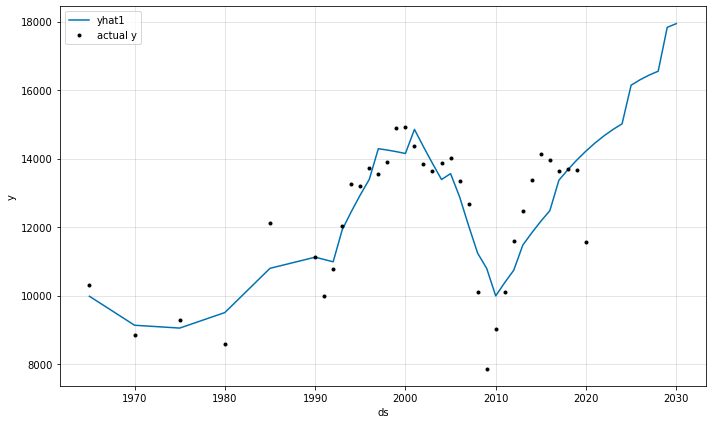

In [33]:
m4 = NeuralProphet(seasonality_mode= "multiplicative", learning_rate = 0.1)
metrics_train2 = m4.fit(df, freq="Y")
future = m4.make_future_dataframe(df, periods=10, n_historic_predictions=36)
forecast = m4.predict(future)
fig = m4.plot(forecast)